# Import dependencies:

In [19]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from os import walk

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# Environment variables:

In [2]:
PATH_BASE="."
PATH_DATA="./data"

# Load images:

In [4]:
img=cv2.cvtColor(cv2.imread(f"{PATH_DATA}/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png", cv2.IMREAD_GRAYSCALE),cv2.COLOR_BGR2RGB)

# Experiments: 

## I. Remove salt pepper:

### I.1. Preprocessing:

In [5]:
imgs=[img]

for ksize in range(3,12,2):
    imgs.append(cv2.cvtColor(cv2.medianBlur(img,ksize), cv2.COLOR_BGR2RGB))

### I.2. Display:

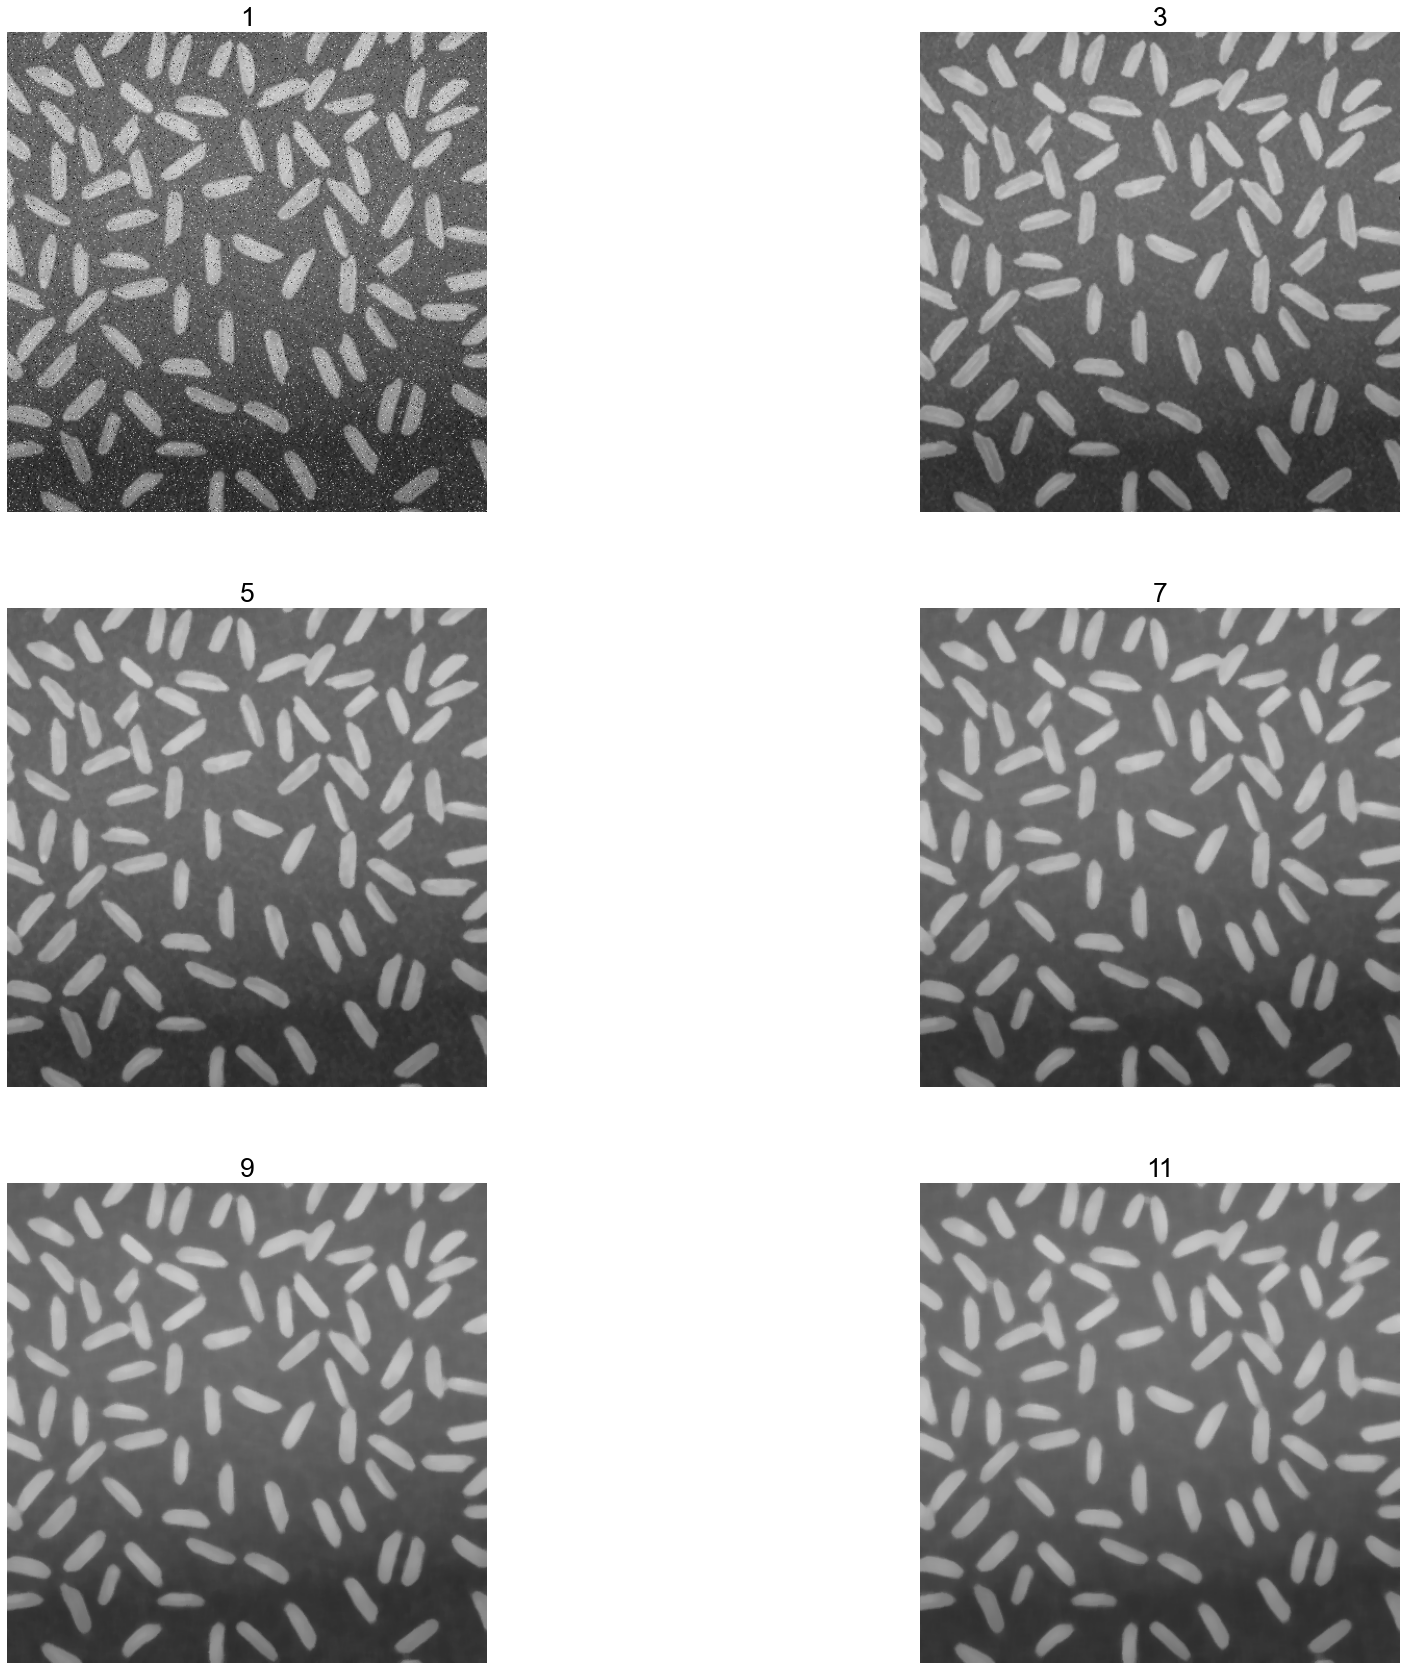

In [12]:
plt.figure(figsize=(30,30))
for i in range(6):
	ax=plt.subplot(3,2,i+1)	
	plt.imshow(imgs[i])
	plt.title(i*2+1)
	plt.axis("off")

### I.3. Apply for dataset:

#### I.3.1. Display original:

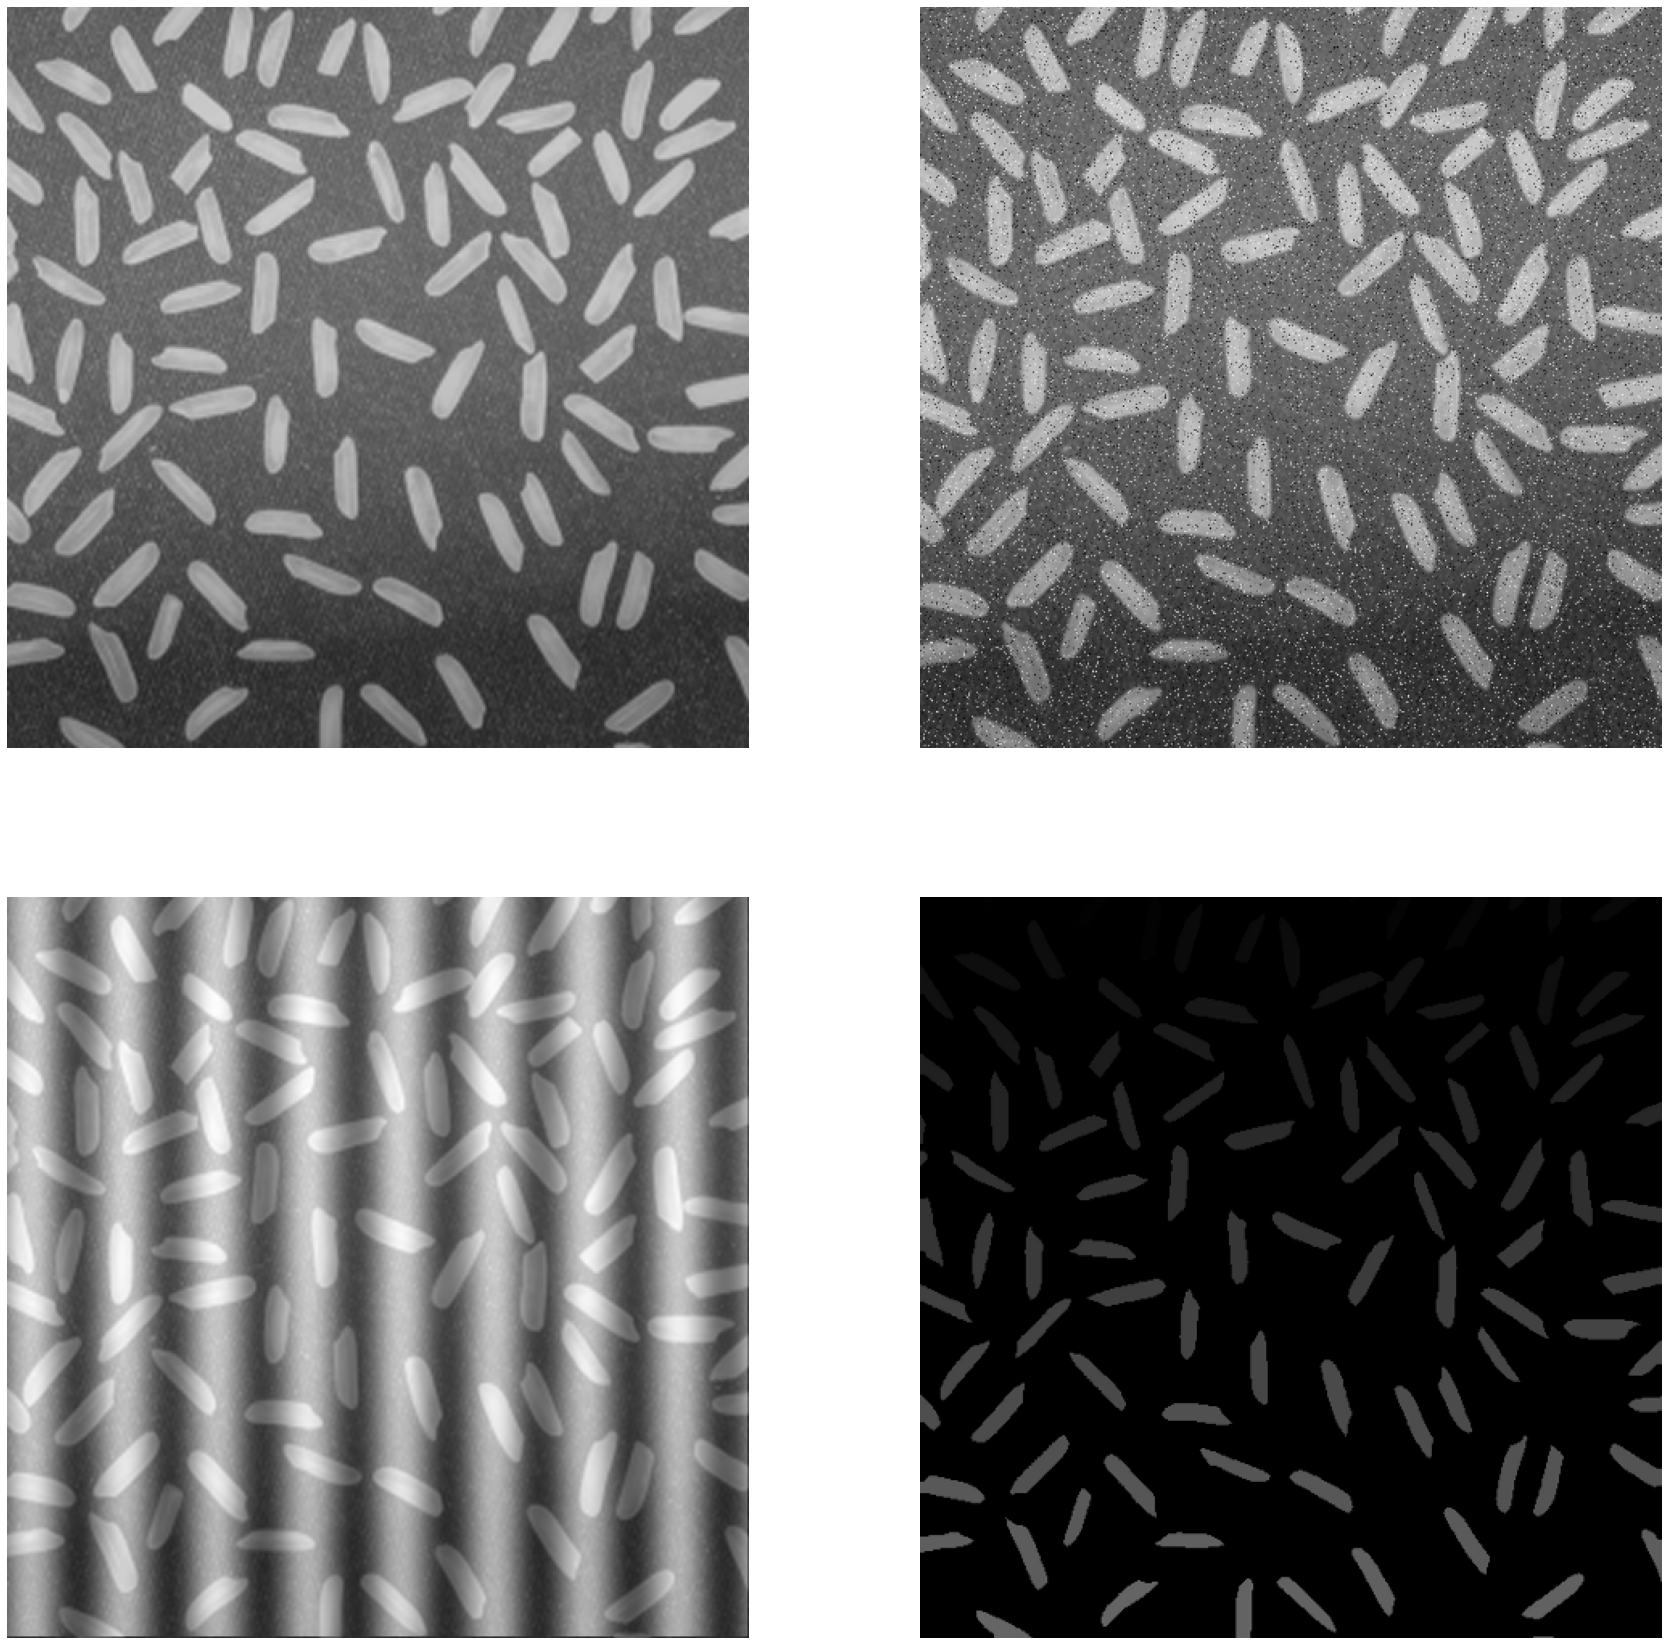

In [25]:
filenames = next(walk(PATH_DATA), (None, None, []))[2] 

plt.figure(figsize=(30,30))
for i in range(4):
	ax=plt.subplot(2,2,i+1)	
	plt.imshow((cv2.cvtColor(cv2.imread(f"{PATH_DATA}/{filenames[i]}", cv2.IMREAD_GRAYSCALE), cv2.COLOR_BGR2RGB)))
	plt.axis("off")

#### I.3.2. Display processed images:

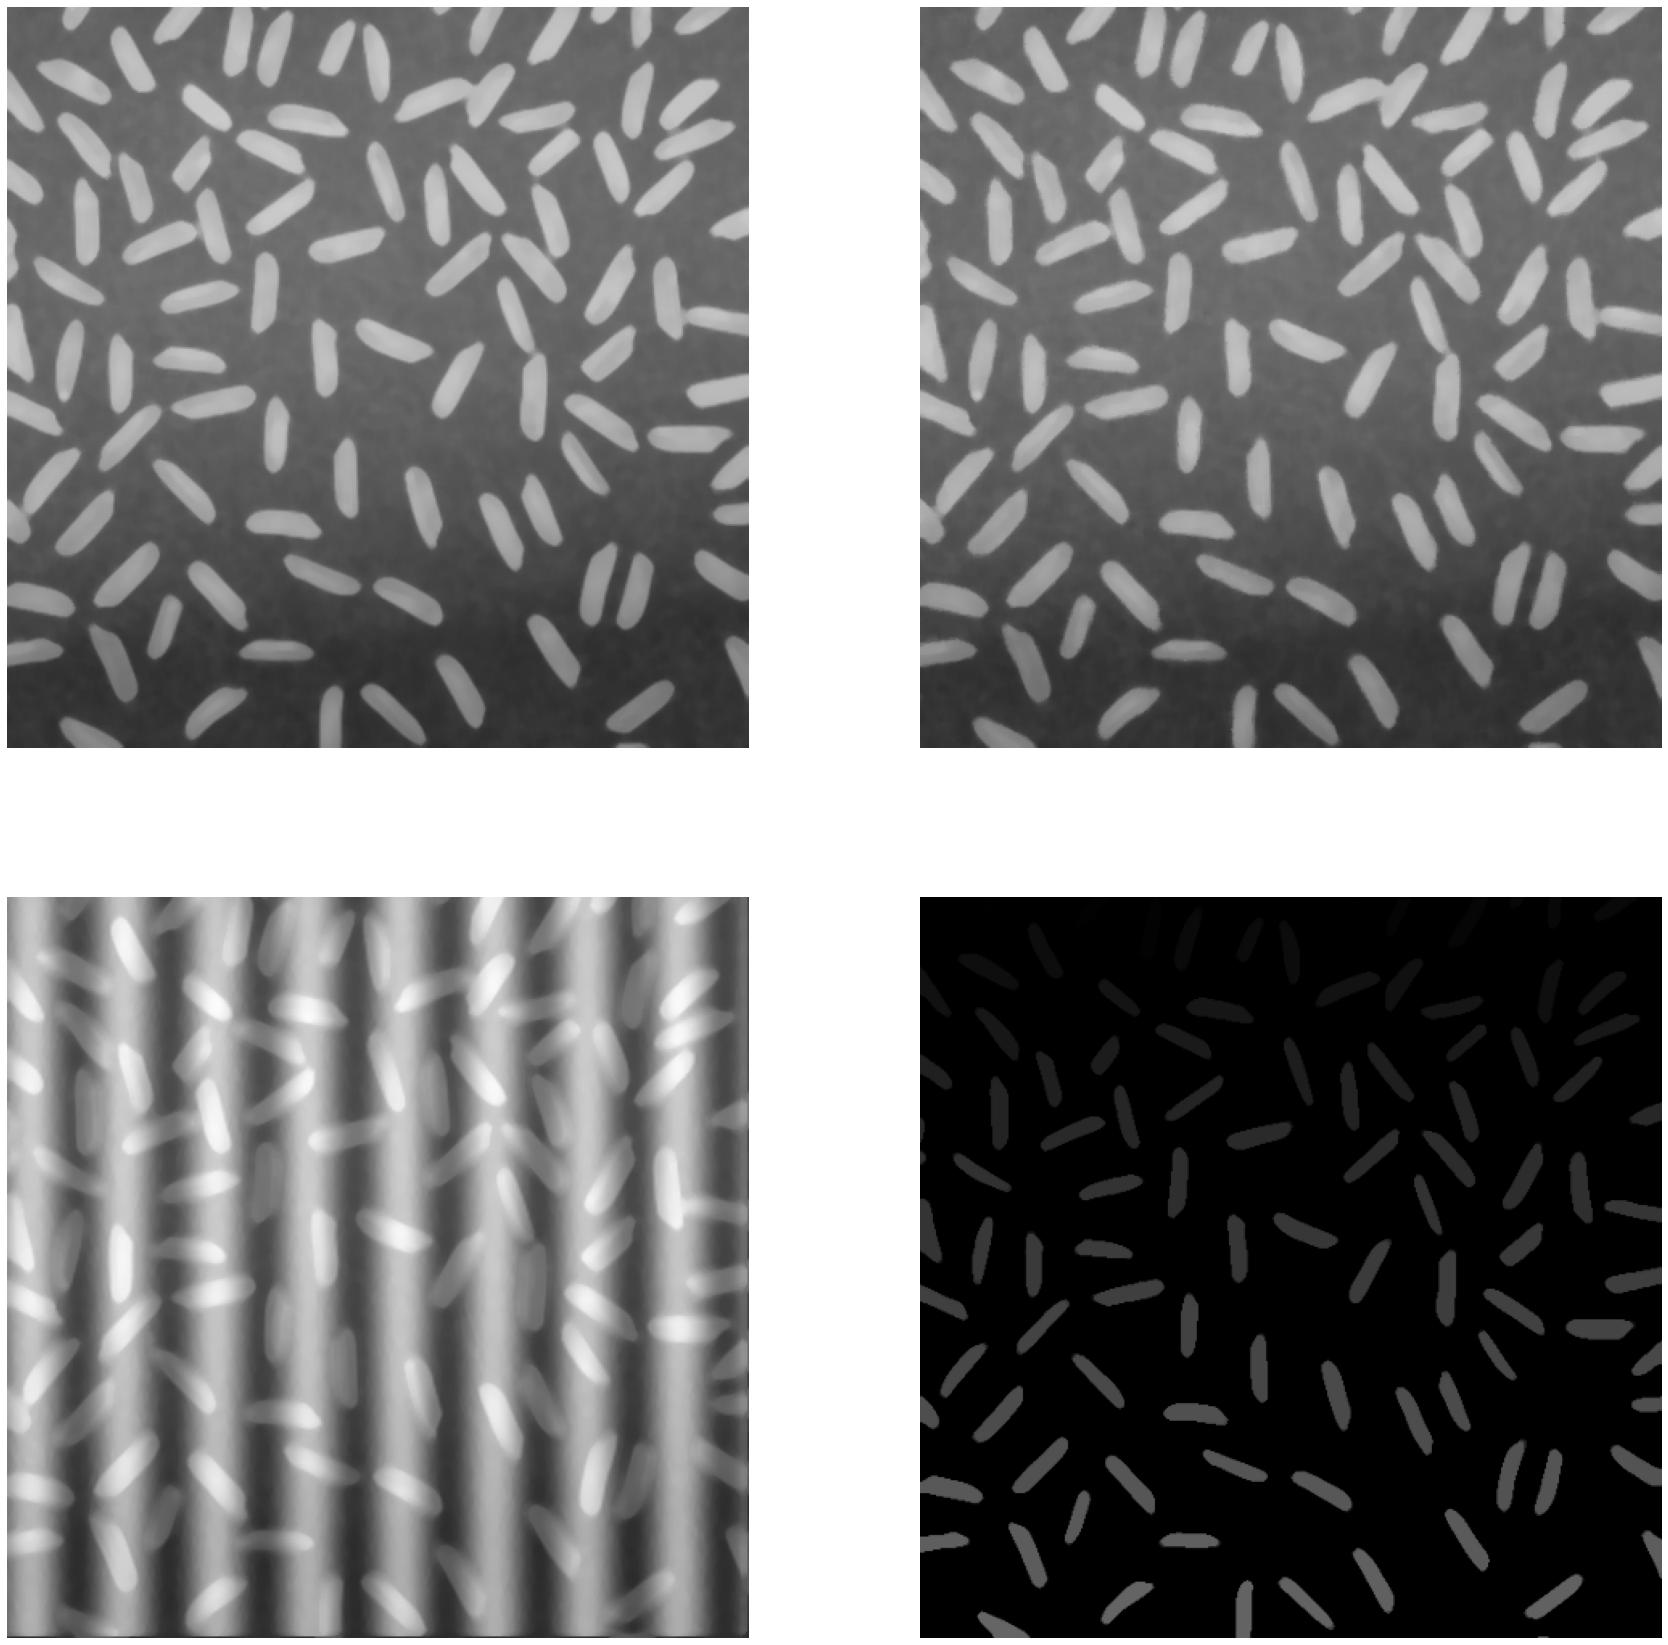

In [27]:
ksize=7

plt.figure(figsize=(30,30))
for i in range(4):
	ax=plt.subplot(2,2,i+1)	
	plt.imshow((cv2.cvtColor(cv2.medianBlur(cv2.imread(f"{PATH_DATA}/{filenames[i]}", cv2.IMREAD_GRAYSCALE),ksize), cv2.COLOR_BGR2RGB)))
	plt.axis("off")

### I.4. Conclusion: 
- ksize=7.

uint8
255
0


102

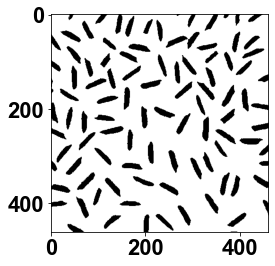

In [271]:
'''
TODO:

(?) convert in memmories.
(?) cmap: Could remove.
(?) Use only threshold could count the "fade" image.
(?) TODO: Display labeled images.
- Sử dụng distance để kiểm tra các ảnh khác có thay đổi nhiều không
- dùng chỉ 1 hoặc 2 bộ tham số cho cả 2 tập ảnh.
'''
import cv2

im=cv2.imread(f"{PATH_DATA}/1_zd6ypc20QAIFMzrbCmJRMg.png")
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
# plt.imshow(img_gray,  cmap='gray')
# plt.show()
(thresh, im_bw) = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY)
print(im_bw.dtype)
print(im_bw.max())
print(im_bw.min())
plt.imshow(im_bw,cmap="binary")
num_labels, labels_im = cv2.connectedComponents(im_bw)
num_labels

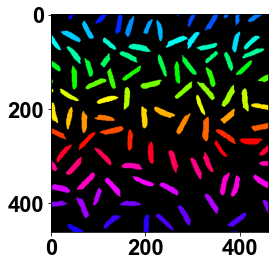

In [241]:
'''
- https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python

'''
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    plt.imshow(labeled_img)
    plt.show()

imshow_components(labels_im)

D:\Users\User\anaconda3\envs\HIPC\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log


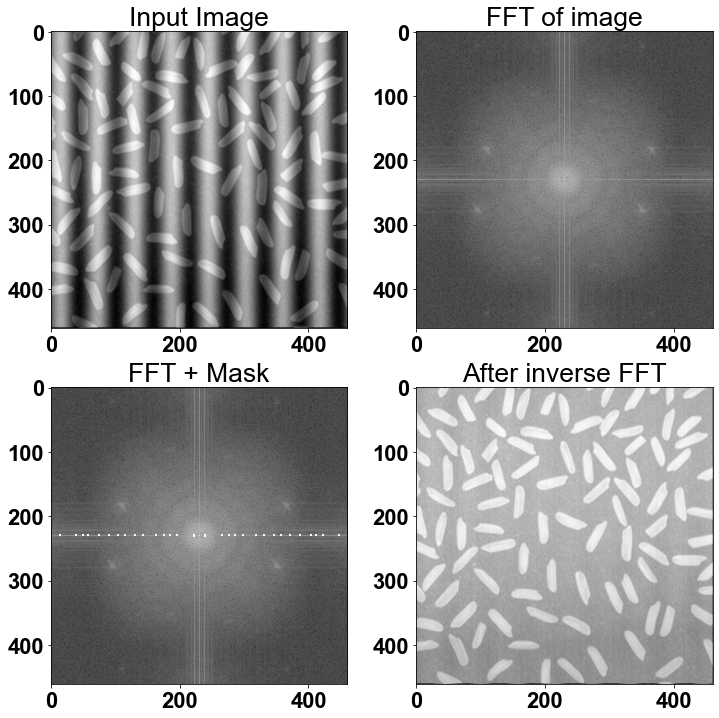

In [188]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

'''
- - https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_peak_local_max.html
'''


o = cv2.imread(f"{PATH_DATA}/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png")
img = cv2.cvtColor(o, cv2.COLOR_RGB2GRAY)
# img = cv2.imread('images/sandstone.tif', 0) # load an image

#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency 
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)

# mask = np.ones((rows, cols, 2), np.uint8)
# r = 80
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
# mask[mask_area] = 0

# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#

# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)
# mask = np.zeros((rows, cols, 2), np.uint8)
# r = 20
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
# mask[mask_area] = 1
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)
# mask = np.zeros((rows, cols, 2), np.uint8)
# r_out = 80
# r_in = 10
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
#                            ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
# mask[mask_area] = 1

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)
mask[231,222,:]=[0,0]
mask[231,238,:]=[0,0]

# delta=1
# for r in range(231 - delta,231+delta):
#     for c in range(222 - delta,222+delta):
#         mask[r,c,:]=[0,0]
        
#     for c in range(239 - delta,239 +delta):
#         mask[r,c,:]=[0,0]



'''
Find A:
'''
# im = img_as_float(data.coins())
im=magnitude_spectrum

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=5, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=5)

res=check_sym(coordinates)

    
for c in res:
    if c[0]==230:
        mask[c[0],c[1]]=[0,0]


# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()

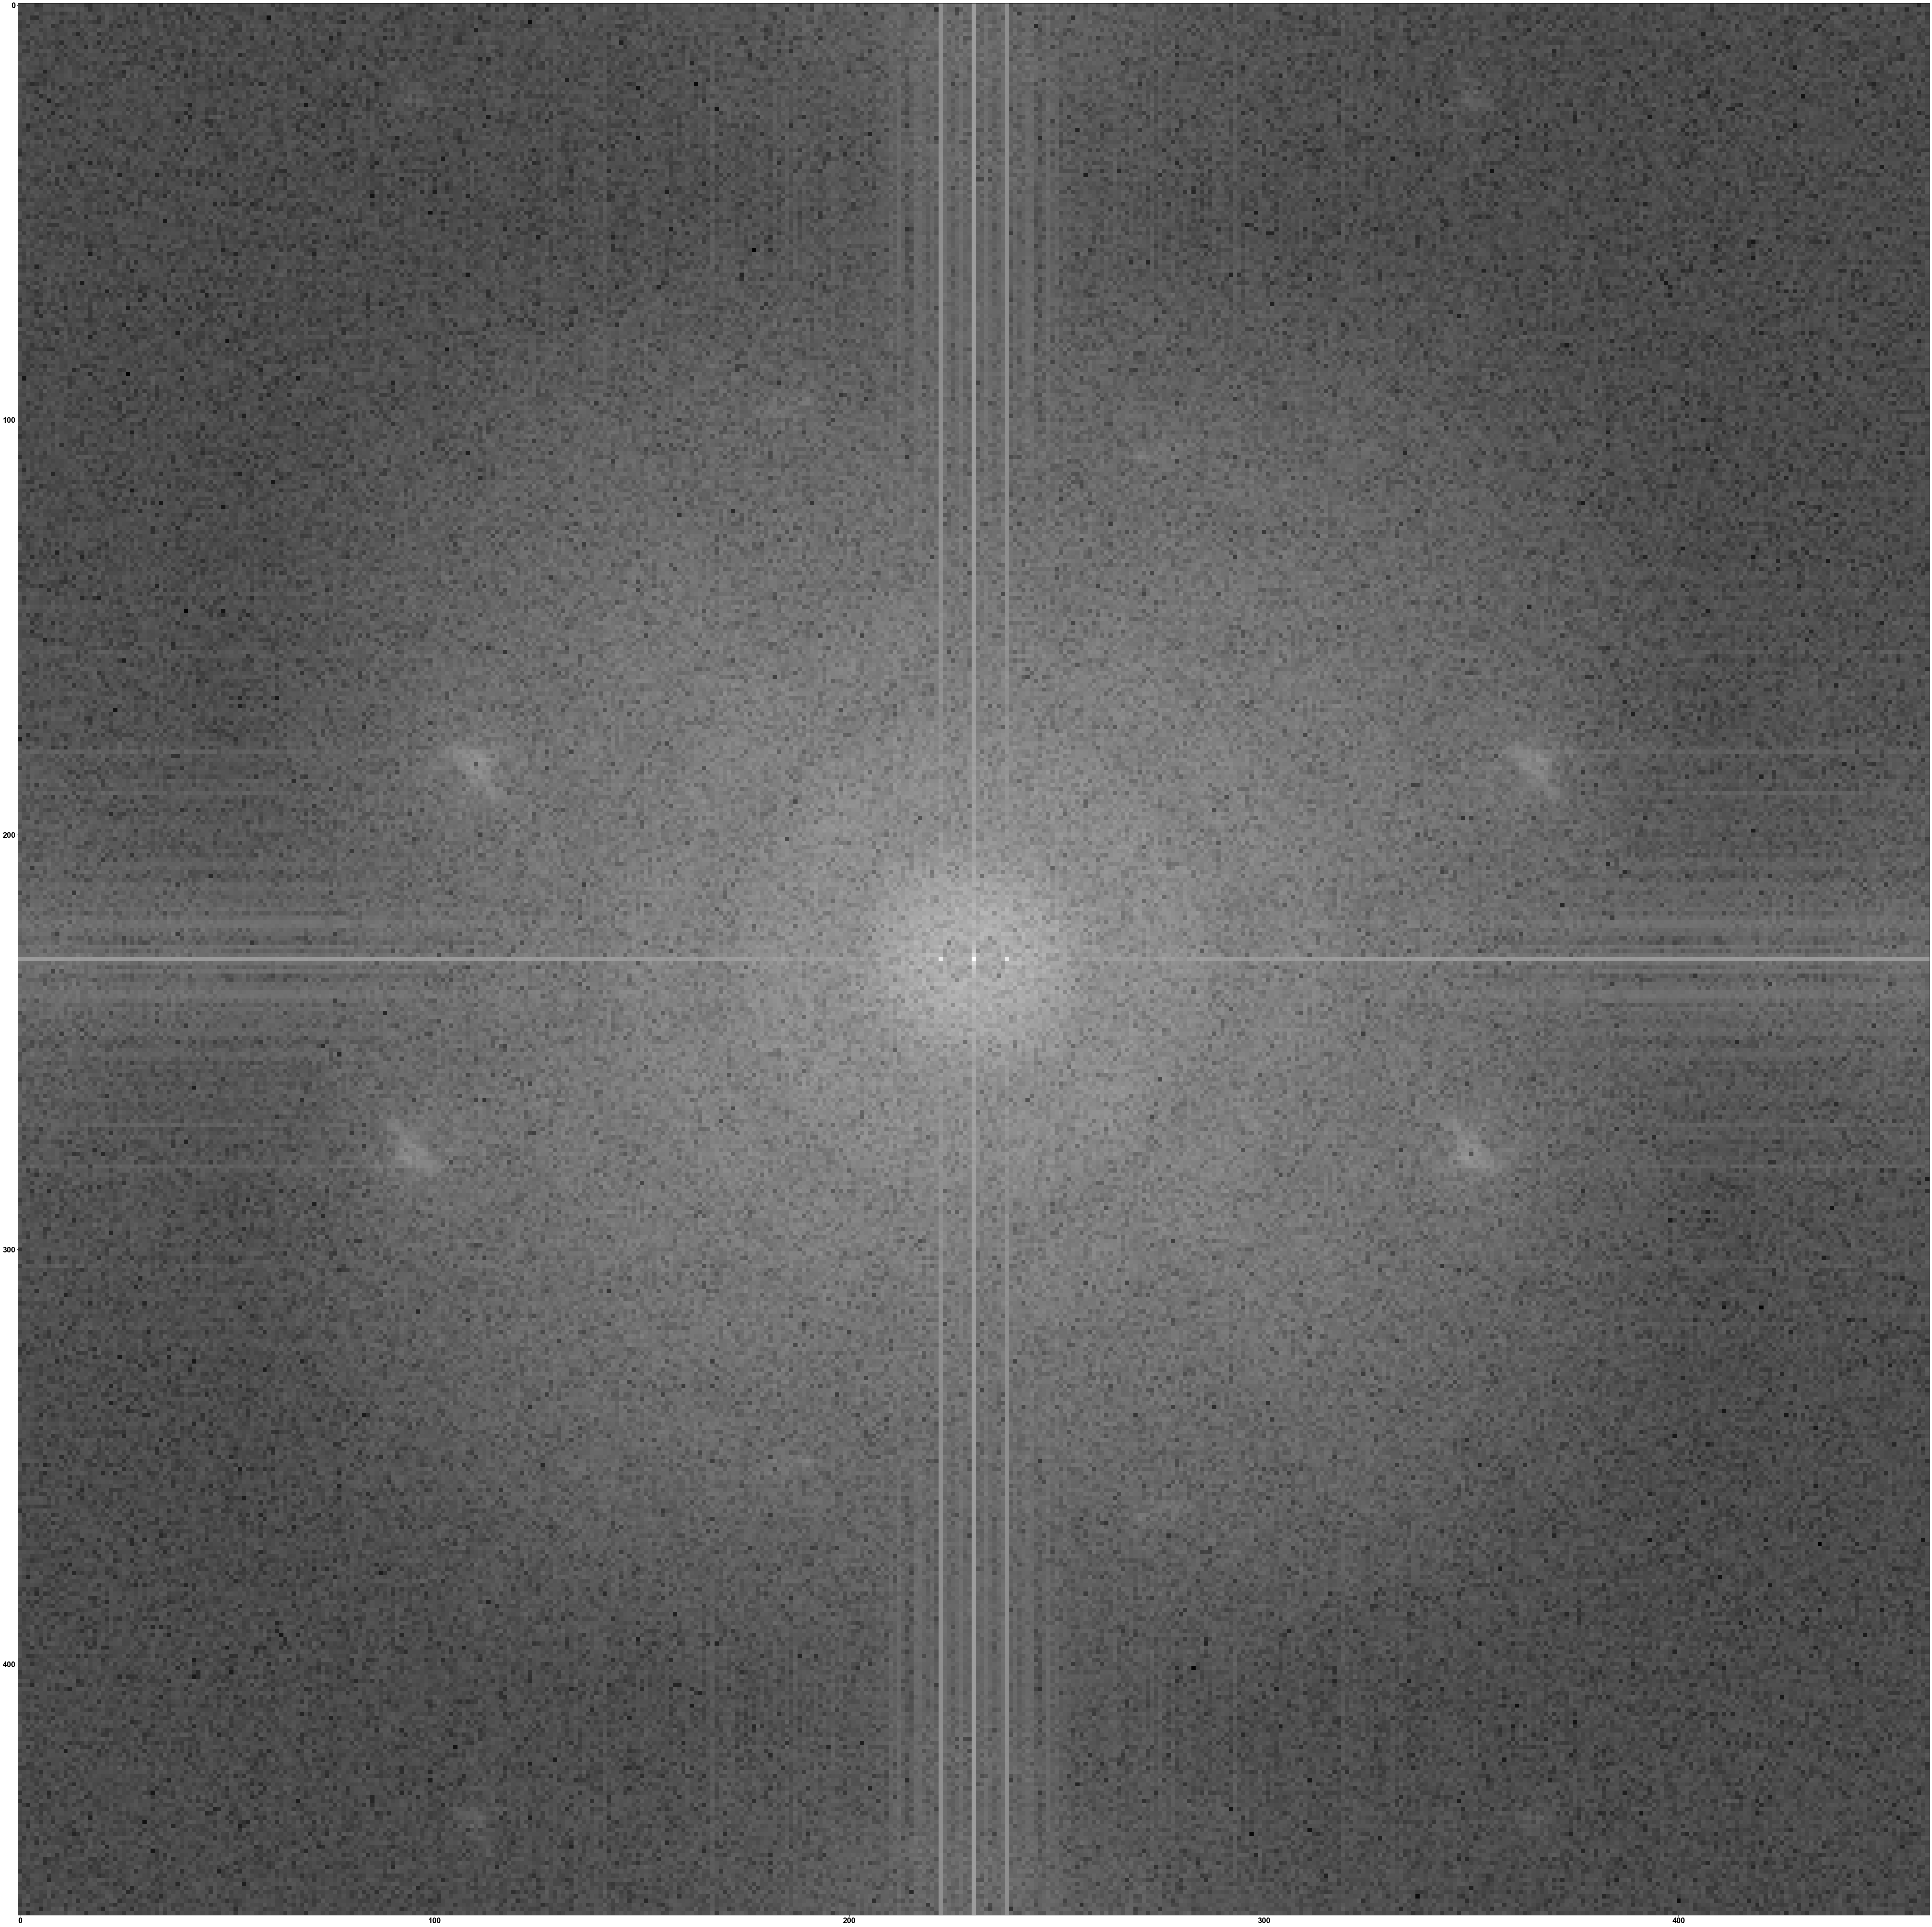

In [180]:
fig = plt.figure(figsize=(100, 100))
plt.imshow(magnitude_spectrum,cmap="gray")

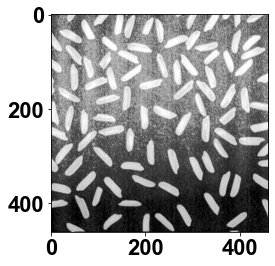

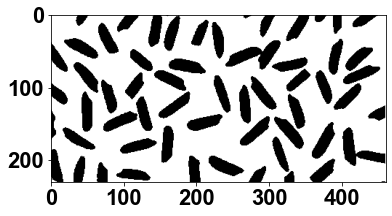

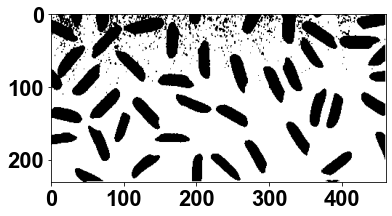

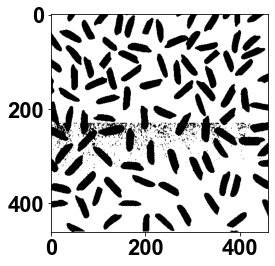

In [264]:
t=img_back/img_back.max()*255.0
t=np.uint8(t)

t=cv2.equalizeHist(t)
plt.imshow(t,cmap="gray")
plt.show()

t0=t[:230,:]
t1=t[230:,:]

(thresh, im_bw0) = cv2.threshold(t0, 200, 255, cv2.THRESH_BINARY)
im_bw0=np.uint8(im_bw0) # TODO: remove this.

plt.imshow(im_bw0,cmap="binary")
plt.show()

(thresh, im_bw1) = cv2.threshold(t1, 125, 255, cv2.THRESH_BINARY)
im_bw1=np.uint8(im_bw1) # TODO: remove this.

plt.imshow(im_bw1,cmap="binary")
plt.show()

im_bw=np.concatenate((im_bw0, im_bw1), axis=0)
plt.imshow(im_bw,cmap="binary")



# (thresh, im_bw) = cv2.threshold(t, 200, 255, cv2.THRESH_BINARY)
# im_bw=np.uint8(im_bw) # TODO: remove this.
# plt.imshow(im_bw,cmap="binary")
# plt.show()
# num_labels, labels_im = cv2.connectedComponents(im_bw)
# num_labels

102

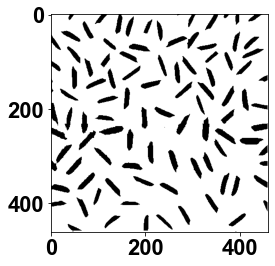

In [271]:
# kernel = np.ones((6,6),np.uint8)
# opening = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, kernel)
# plt.imshow(opening,cmap="binary")
# num_labels, labels_im = cv2.connectedComponents(opening)
# num_labels

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(im_bw,kernel,iterations = 1)
plt.imshow(erosion,cmap="binary")
num_labels, labels_im = cv2.connectedComponents(erosion)
num_labels

In [169]:
def find_sym(point, point_list,origin):
    sym_point=np.subtract(np.array(origin)*2,point)
    for p in point_list:
        if (sym_point==p).all():
            return sym_point
    return np.empty([0,0])

In [175]:
def check_sym(point_list,origin=[230,230]):
    res=[]
    for i in range(len(point_list)-1):
        point=point_list[i,:]
        sym_point=find_sym(point,point_list[i+1:,:],origin)
        if len(sym_point):
            res.append(point)
            res.append(sym_point)
    return res